<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/ml/15_XOR%EA%B2%8C%EC%9D%B4%ED%8A%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XOR 게이트 구현해보기 <br>
0,0 -> 0 <br>
0,1 -> 1 <br>
1,0 -> 1 <br>
1,1 -> 0 

### step 1) 데이터 준비하기

In [1]:
import numpy as np
import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse


In [2]:
data = np.array([[0,0],[1,0],[0,1],[1,1]]) # XOR연산 학습 데이터
label = np.array([[0],[1],[1],[0]]) # 정답

### step 2) 모델 구성하기

In [3]:
model = Sequential()

# 다층 퍼셉트론을 구성
model.add(Dense(32,input_shape=(2,), activation='relu'))
model.add(Dense(1,activation='sigmoid'))

### step 3) 모델 설정하기

In [4]:
#model.compile(optimizer=SGD(), loss=mse, metrics = ['acc'])
model.compile(optimizer=RMSprop(), loss=mse, metrics = ['acc'])

In [5]:
# 모델 확인하기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


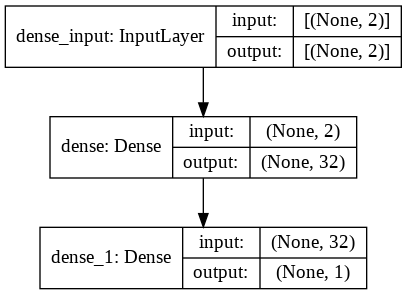

In [6]:
tf.keras.utils.plot_model(model, 
                          show_shapes=True, 
                          show_layer_names=True,
                          rankdir='TB', 
                          expand_nested=False, 
                          dpi=96)


### step 4) 모델 학습시키기

In [7]:
history = model.fit(data,label, epochs=500) # 학습데이터, 정답, 공부횟수

Epoch 1/500
1/1 [==============================] - 0s 469ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 23ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/500
1/1 [==============================] - 0s 18ms/step - loss: 0.2

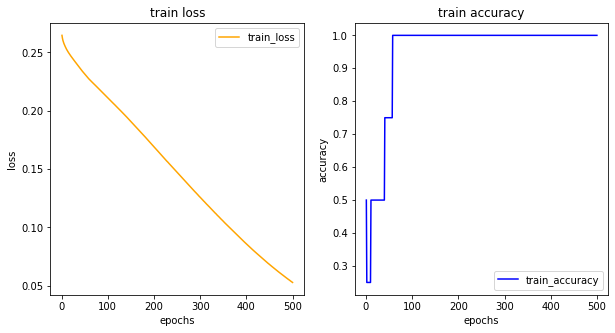

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


모델 가중치 확인

In [9]:
model.get_weights()

[array([[ 0.48594195, -0.5144442 ,  0.82300997,  0.10854518, -0.42670426,
          0.33436042,  0.6398886 , -0.3284396 , -0.13779789, -0.44522592,
          0.27092925, -0.31121126,  0.26130438,  0.36181462,  0.36218402,
          0.7077123 , -0.03311983, -0.37055987, -0.3493019 ,  0.4119753 ,
         -0.5374295 , -0.5383001 , -0.12625915,  0.36281487, -0.5397503 ,
         -0.4093977 ,  0.63669336, -0.17278033, -0.43074408,  0.63314956,
         -0.33862218, -0.00082418],
        [-0.48495954,  0.51336867,  0.16936918, -0.19489145,  0.42741483,
          0.33453265, -0.5386218 ,  0.3319505 ,  0.06527963,  0.44588178,
          0.2705928 ,  0.1796752 ,  0.26117665,  0.4470006 ,  0.4218385 ,
          0.22729358, -0.01398495, -0.06497911,  0.04891233,  0.46513578,
          0.5366787 ,  0.5387085 , -0.2543157 ,  0.38479722,  0.5402947 ,
         -0.17654489, -0.63624465, -0.3430747 ,  0.43148756,  0.20082705,
          0.05100494, -0.4087645 ]], dtype=float32),
 array([ 2.63898575e-04

### step 5) 모델 예측하기

In [10]:
result = model.predict_classes(data)
print(result)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]
 [1]
 [1]
 [0]]
